In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [48]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [49]:
df['class'] = df['class'].map({'g':0, 'h':1})
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


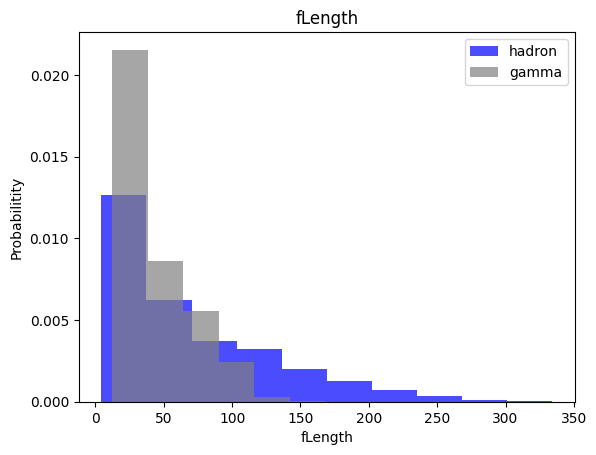

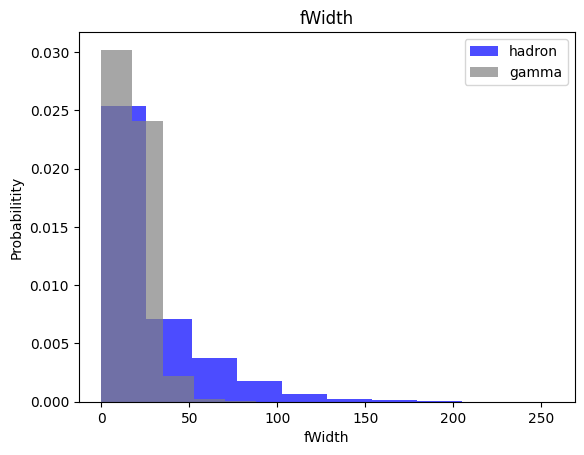

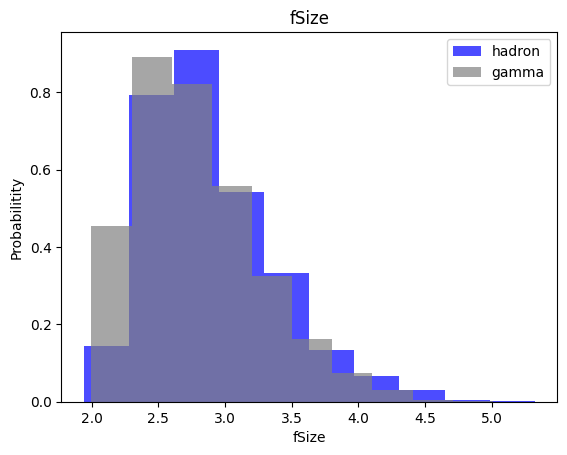

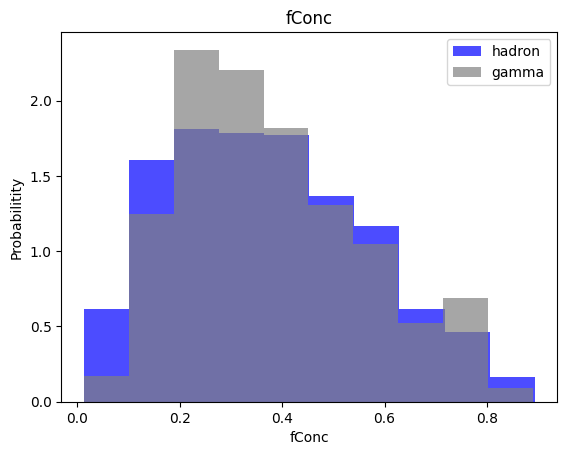

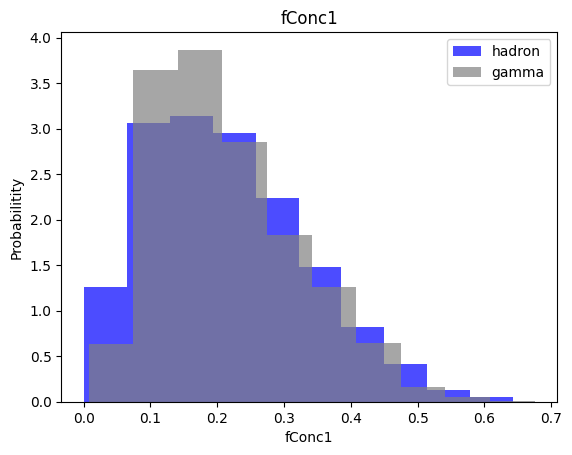

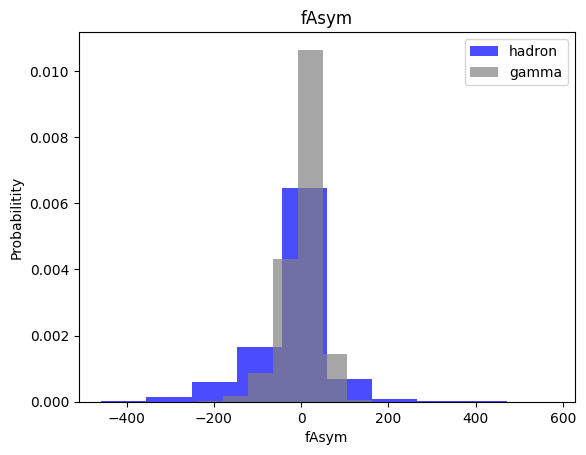

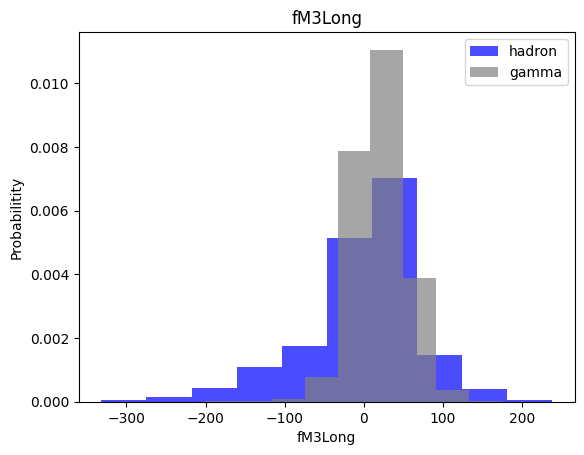

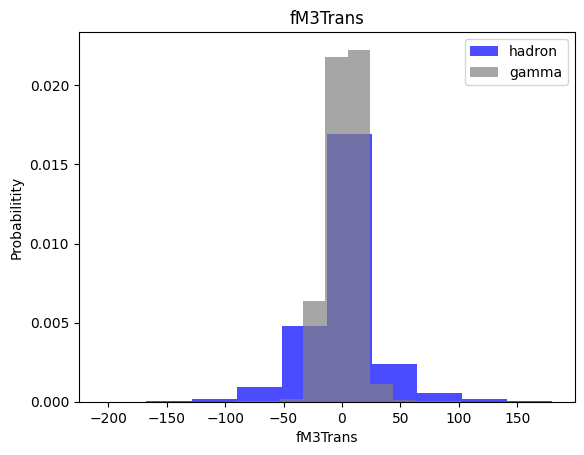

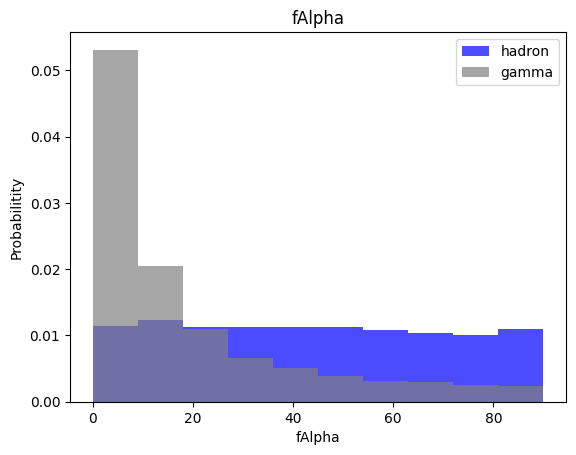

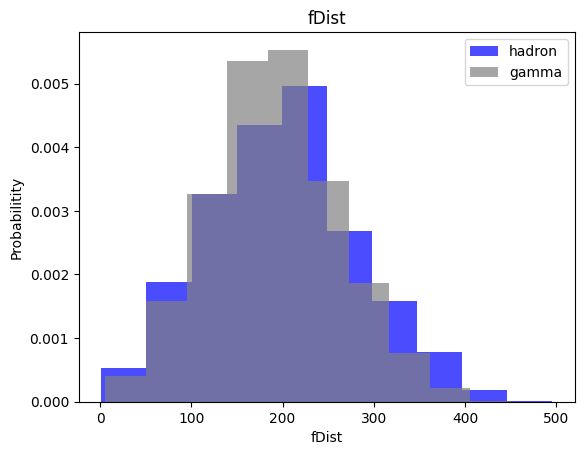

In [50]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='hadron', alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label], color='gray', label='gamma', alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('Probabilitity')
    plt.xlabel(label) 
    plt.legend()
    plt.show()  

In [71]:
train,  valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/juancarlos/.local/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [70]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
                  
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X,np.reshape(y, (-1,1))))
    return data, X, y

In [72]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# Using kNN Model


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [55]:
kNN_model = KNeighborsClassifier(n_neighbors=1)
kNN_model.fit(X_train, y_train)


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
y_pred = kNN_model.predict(X_test)

In [57]:
y_pred, y_test


(array([1, 0, 0, ..., 1, 1, 0], shape=(3804,)),
 array([1, 0, 0, ..., 1, 1, 0], shape=(3804,)))

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2512
           1       0.76      0.66      0.71      1292

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.78      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [21]:
y_pred = NB_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      2456
           1       0.72      0.40      0.52      1348

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Log Reg

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2456
           1       0.70      0.72      0.71      1348

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.79      0.79      0.79      3804



# Support vector machines

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2456
           1       0.83      0.78      0.80      1348

    accuracy                           0.86      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net


In [59]:
import tensorflow as tf

In [60]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('BinaryCrossEntropy')
    ax1.grid()
    
    ax2.plot(history.history['accuracy'], label='aaccuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid()

    #plt.legend()
    plt.show()


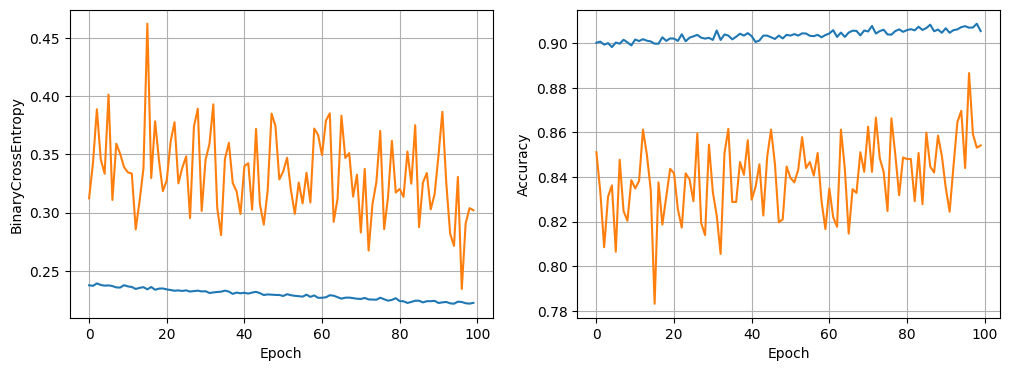

In [61]:
plot_history(history)

In [67]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss = 'binary_crossentropy', metrics=['accuracy'])
    
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return nn_model, history   

num nodes 16, dropout 0.1, lr 0.1, batch size 16


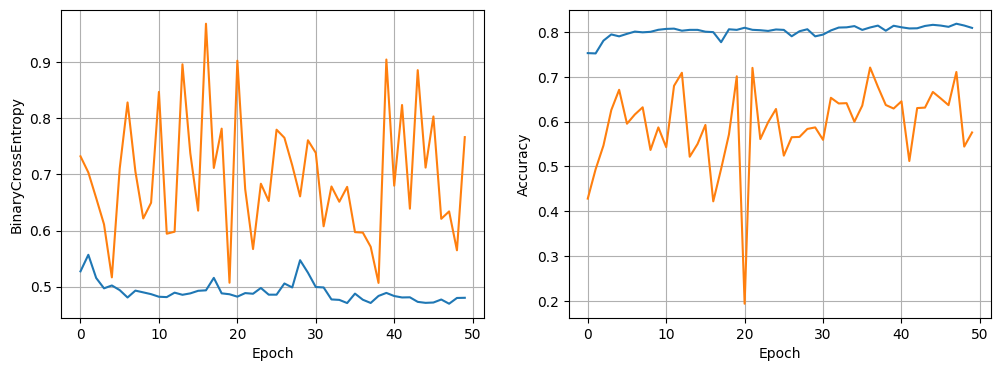

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8436 - loss: 0.4263
num nodes 16, dropout 0.1, lr 0.1, batch size 32


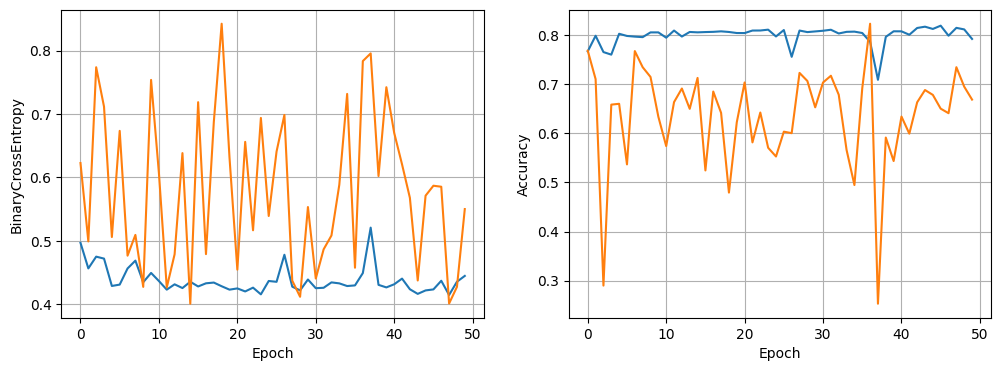

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8699 - loss: 0.3366
num nodes 16, dropout 0.1, lr 0.1, batch size 64


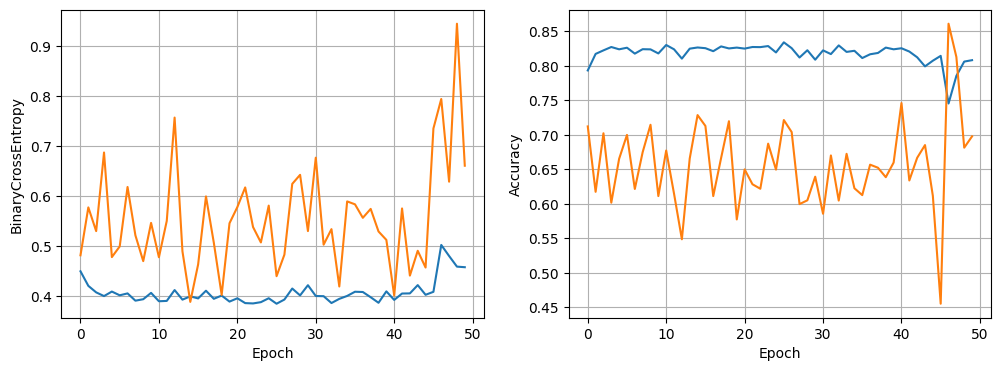

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8620 - loss: 0.3829
num nodes 16, dropout 0.1, lr 0.01, batch size 16


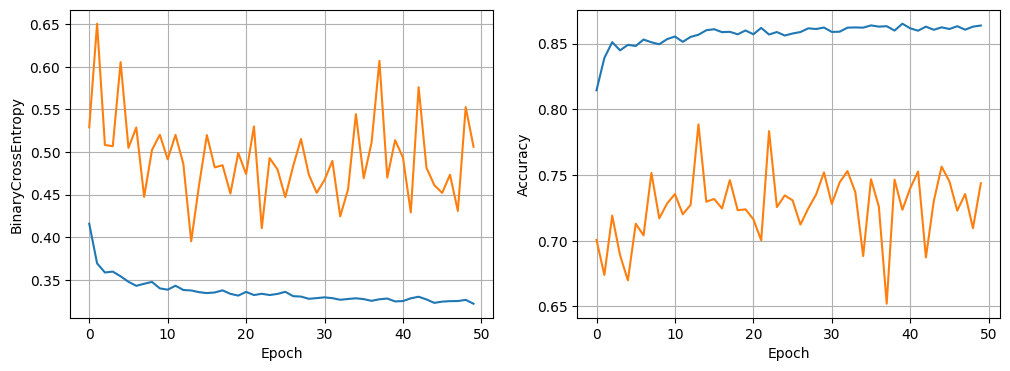

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8820 - loss: 0.2963
num nodes 16, dropout 0.1, lr 0.01, batch size 32


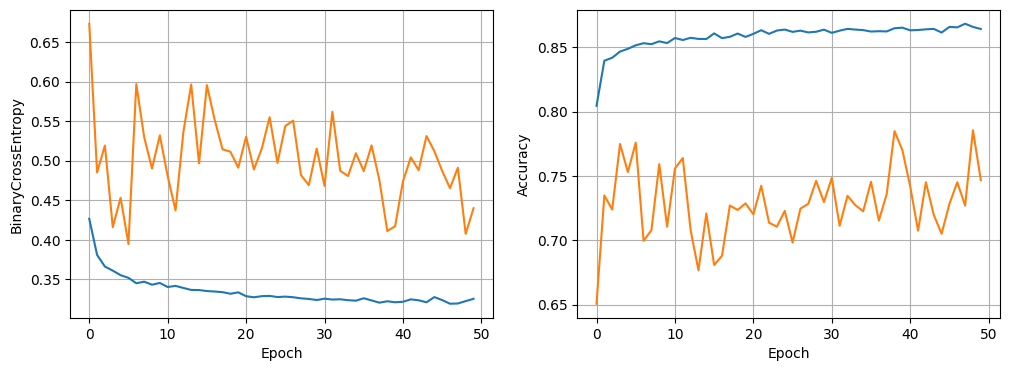

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8778 - loss: 0.3056
num nodes 16, dropout 0.1, lr 0.01, batch size 64


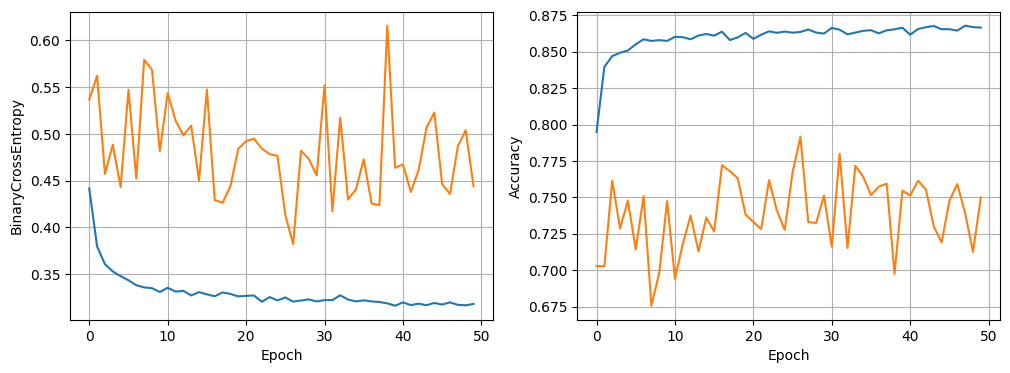

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8775 - loss: 0.2978
num nodes 16, dropout 0.1, lr 0.001, batch size 16


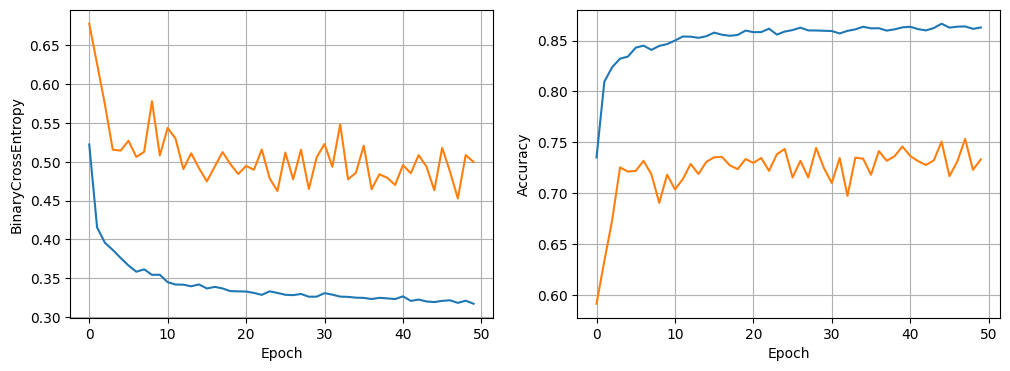

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8807 - loss: 0.2879
num nodes 16, dropout 0.1, lr 0.001, batch size 32


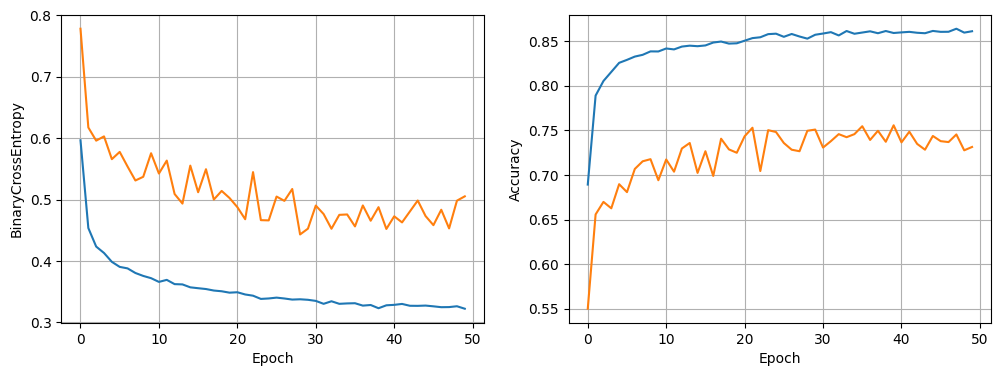

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8835 - loss: 0.2883
num nodes 16, dropout 0.1, lr 0.001, batch size 64


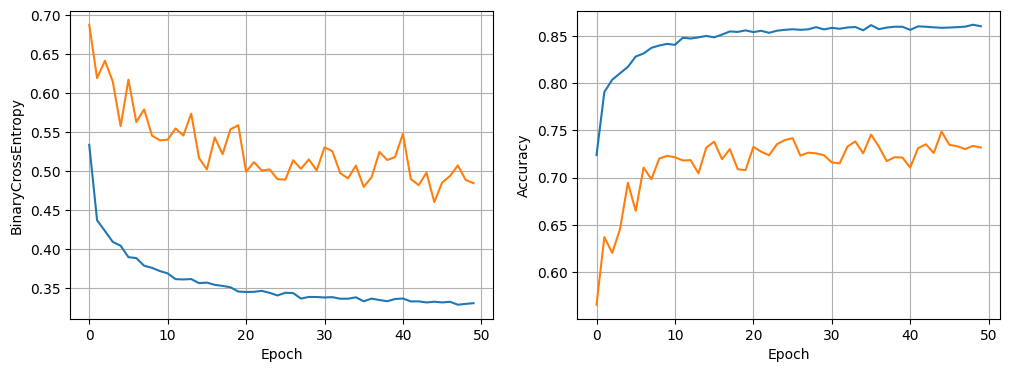

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8814 - loss: 0.2962
num nodes 16, dropout 0.2, lr 0.1, batch size 16


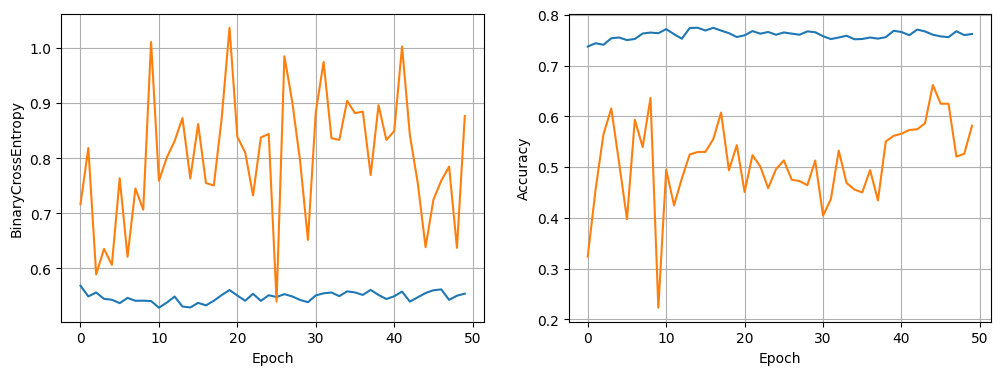

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8257 - loss: 0.4815
num nodes 16, dropout 0.2, lr 0.1, batch size 32


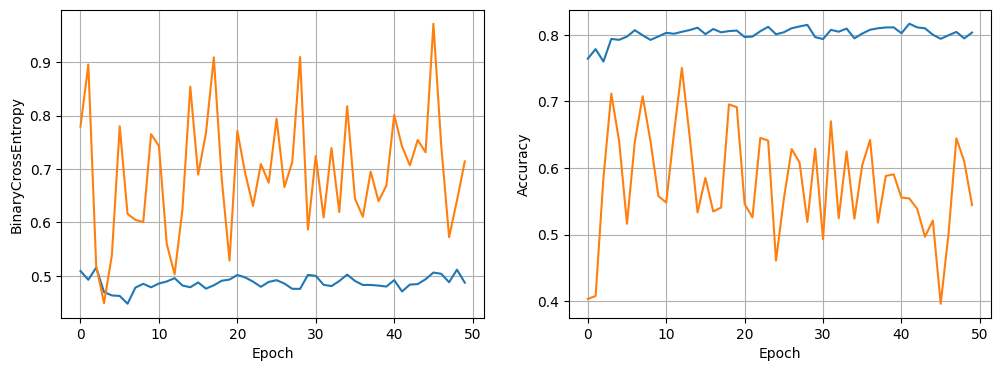

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8436 - loss: 0.4208
num nodes 16, dropout 0.2, lr 0.1, batch size 64


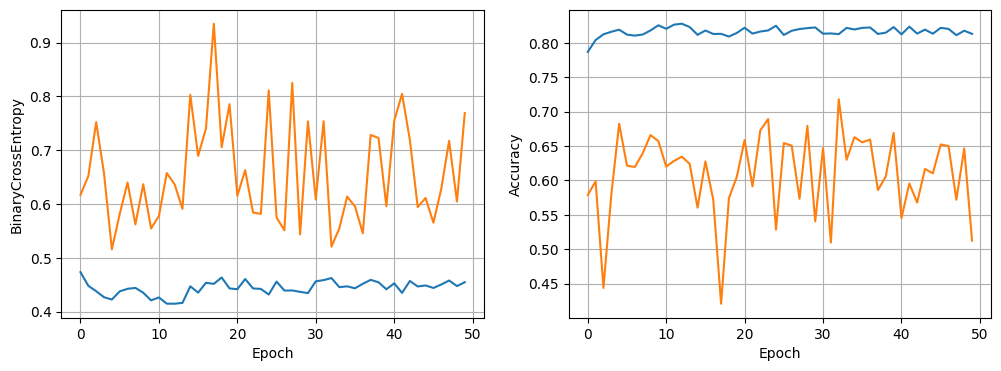

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8362 - loss: 0.3983
num nodes 16, dropout 0.2, lr 0.01, batch size 16


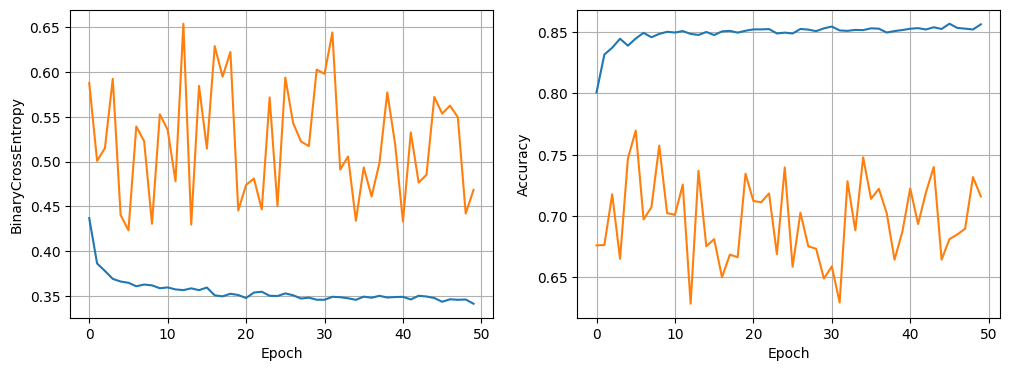

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8788 - loss: 0.3017
num nodes 16, dropout 0.2, lr 0.01, batch size 32


In [ ]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 50
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0.1, 0.2]:
        for lr in [0.1, 0.01, 0.001]:
            for batch_size in [16, 32, 64]:
                print(f"num nodes {num_nodes}, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model